# <span style="color:red"> Lezione 7 </span>

### <span style="color:black"> C++ code </span>

<span style="color:red">Hint:</span> siccome i file di output sono aperti in `append` prima di ogni esecuzione vanno cancellati

* 7.1 

In questo esercizio è stato utilizzato il codice già fornito. Per andare a studiare i vari casi `input.gas/.liquid/.solid` dopo il comando `./Monte_Carlo_NVT.exe` bisogna aggiungere un numero:
    - 1 --> Gas
    - 2 --> Liquido
    - 3 --> Solido
La parte della scrittura dei file `.xyz` è lasciata  commentata per evitare la scrittura di tali file e il loro upload su GitHub (anche se sono contenuti in `.gitignore`).

Per l'quilibrazione dopo una prima esecuzione ho guardato i valori istantanei (i file prima eq li ho salvati in una directory `7.1_before_eq` a parte) e scelto 1500 steps per tutti i tre stati (ben consapevole che pe i casi del liquido e del solido possono essere minore, ma il costo computazione è irrilevante per questo caso). Per andare a ristudiare il caso non equilibrato, basta commentare la parte di `equilibration` in `Monte_Carlo_NVT.cpp`.


* 7.2

* In questo esercizio è stato preso il codice del 7.1 ed è stato riadattato in programmazione ad oggetti (è stata pure implementata un'equilibrazione più precisa per ogni stato in base ai risultati in 7.1). GLi oggetti (classi) sono:
    - `funzioni.h`: contiene la funzione per creare il gen rnd,
    - `MC_NVT.h`: presenta vari set e vari metodi presi dal codice 7.1. Altri metodi aggiuntivi:
        - `Equilibration(Random& rnd, int state_of_the_system)` in base allo stato (state_of_the_system=1,2,3-->g,l,s) compie un numero di step per equlibrare il sistema differenti (guardare 7.1);
        - `Print_hist_block()` stampa gli istogrammi dei singoli blocchi nel file `histigram_(state).0`. Quindi in questo file avrò i dati dei `nblk` blocchi in seguito.
        - `Final_g_err()` tramite la media a blocchi sui `nblk` istogrammi ne estrae il valor medio ed incertezza e li stampa nel file `final_hist_(state).0`
        
Tutti i file di output sono contenuti nella directory `data`

## <span style="color:green">Esercizio 7.1</span>

Definisco le funzioni per la lettura e il plotting. I dati sono caricati dagli output contenuti nella directory `data` e sono così composti:
- insta_values_(state).0:

1° colonna|2° colonna|
----------|----------|
int pot ene|insta press|



In [17]:
# Setting and reading file
import numpy as np
import matplotlib.pyplot as plt
import math
# read 
def read_befeq(state):
    pot, pres = np.loadtxt(f"7.1_before_eq/insta_values_"+state+".0",\
            usecols=(0,1), delimiter=' ', unpack='true')
    return pot, pres
def read_eq(state):
    pot, pres = np.loadtxt(f"7.1/insta_values_"+state+".0",\
            usecols=(0,1), delimiter=' ', unpack='true')
    return pot, pres

def plot_befeq(state,i): # i è il numero della riga
    pot, pres = read_befeq(state)
    ax[i,0].plot(pot, label='Pot energy insta')
    ax[i,0].set_title(f'Pot energy insta '+state)
    ax[i,0].set_xlabel('# steps')
    ax[i,0].set_ylabel('U/N')
    ax[i,0].legend()
    ax[i,0].grid(True)
    # pressure 
    ax[i,1].plot(pres, color='orange', label='Pressure insta')
    ax[i,1].set_title(f'Pressure insta '+state)
    ax[i,1].set_xlabel('# steps')
    ax[i,1].set_ylabel('P')
    ax[i,1].legend()
    ax[i,1].grid(True)
    
def plot_eq(state,i): # i è il numero della riga
    pot, pres = read_eq(state)
    ax[i,0].plot(pot, label='Pot energy insta')
    ax[i,0].set_title(f'Pot energy insta '+state)
    ax[i,0].set_xlabel('# steps')
    ax[i,0].set_ylabel('U/N')
    ax[i,0].legend()
    ax[i,0].grid(True)
    # pressure 
    ax[i,1].plot(pres, color='orange', label='Pressure insta')
    ax[i,1].set_title(f'Pressure insta '+state)
    ax[i,1].set_xlabel('# steps')
    ax[i,1].set_ylabel('P')
    ax[i,1].legend()
    ax[i,1].grid(True)

#### <span style="color:blue">Before equilibration</span>

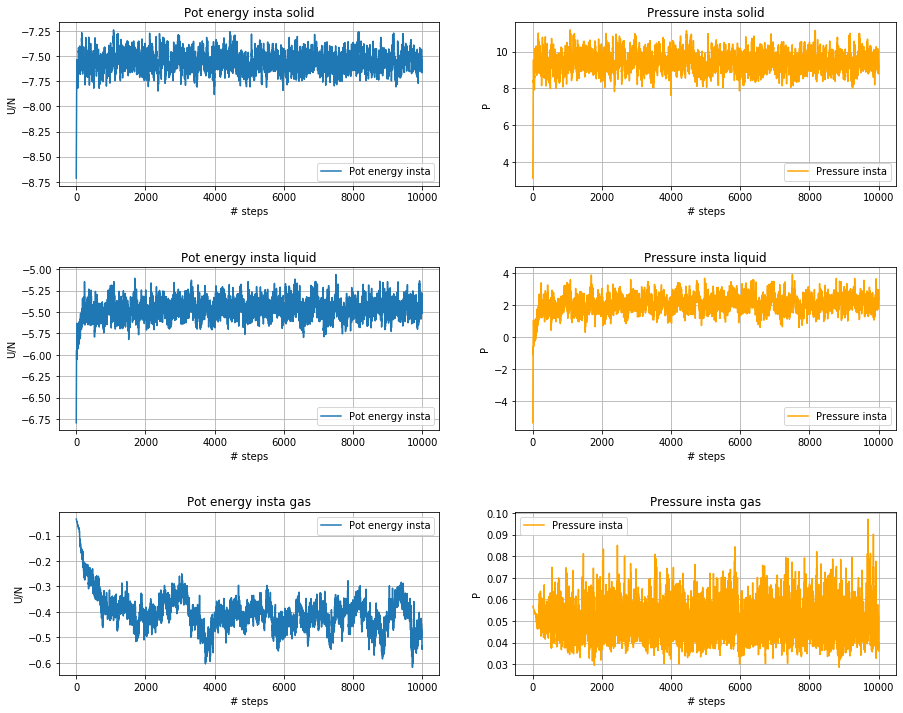

In [18]:
fig, ax = plt.subplots(nrows=3, ncols=2,figsize=(15,12),gridspec_kw=dict(wspace=0.2, hspace=0.5))
# solid
plot_befeq('solid',0)
# liquid
plot_befeq('liquid',1)
#gas
plot_befeq('gas',2)

Sono stati plottate l'energia interna e la pressione istantanee e si può chiaramente vedere che il sistema si equilibria dopo:

* GAS ---> 1500 steps MC
* LIQUID ---> 1000 steps MC
* SOLID ---> 750 steps MC

#### <span style="color:blue">After equilibration</span>

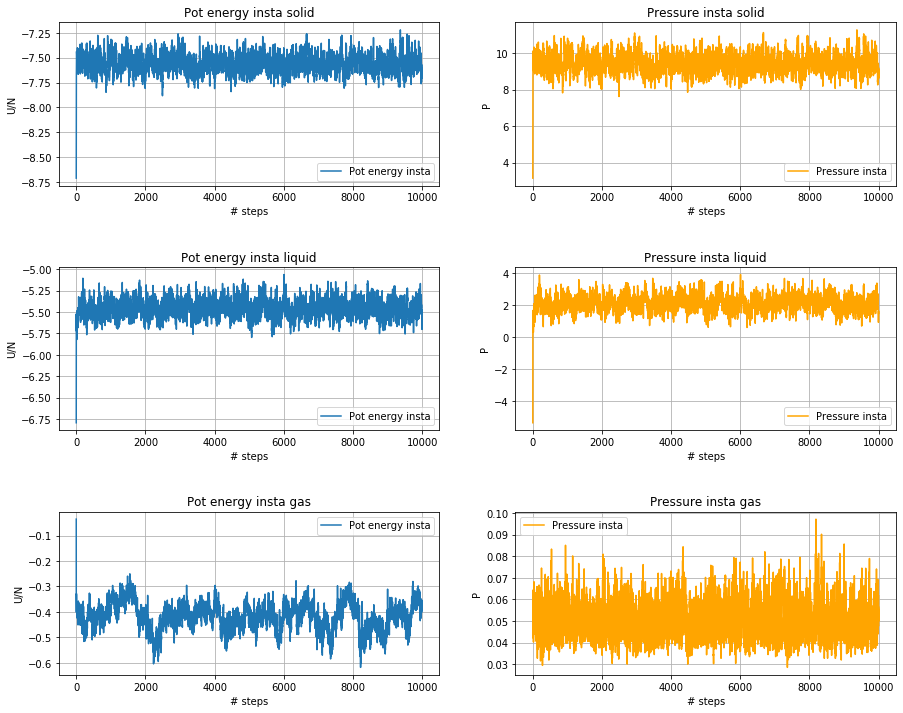

In [20]:
fig, ax = plt.subplots(nrows=3, ncols=2,figsize=(15,12),gridspec_kw=dict(wspace=0.2, hspace=0.5))
# solid
plot_eq('solid',0)
# liquid
plot_eq('liquid',1)
#gas
plot_eq('gas',2)

#### <span style="color:blue">Python script of the autocorrelation functions</span>

Per andare a calcolare l'autocorrelazione serve che il sistema sia equilibrato. L'equilibrazione è stata implementata in 7.2 ed è per questo che rileggiamo i file dei valori istantanei. Ridefinisco così le funzioni di lettura e plot.

In [120]:
# read
def read_7_2(state):
    pot, pres = np.loadtxt(f"7.2/data/insta_values_"+state+".0",\
            usecols=(0,1), delimiter=' ', unpack='true')
    return pot, pres
# plot
def plot_AC_log(state,i,x):
    pot, pres = read_7_2(state)
    bx[i].plot(x,estimated_autocorrelation(pres))
    bx[i].set_xlabel('# MC steps in block')
    bx[i].set_ylabel('Ac')
    bx[i].grid(True)
    bx[i].set_title(f""+state+" phase: ac pressure")
    bx[i].set_xscale('log')
def plot_AC(state,i,x):
    pot, pres = read_7_2(state)
    bx[i].plot(x,estimated_autocorrelation(pres))
    bx[i].set_xlabel('# MC steps in block')
    bx[i].set_ylabel('Ac')
    bx[i].grid(True)
    bx[i].set_title(f""+state+" phase: ac pressure")
# AC
def estimated_autocorrelation(x):
    n = len(x)
    variance = x.var()
    x = x-x.mean()
    r = np.correlate(x, x, mode = 'full')[-n:]
    #assert N.allclose(r, N.array([(x[:n-k]*x[-(n-k):]).sum() for k in range(n)]))
    result = r/(variance*n)
    return result

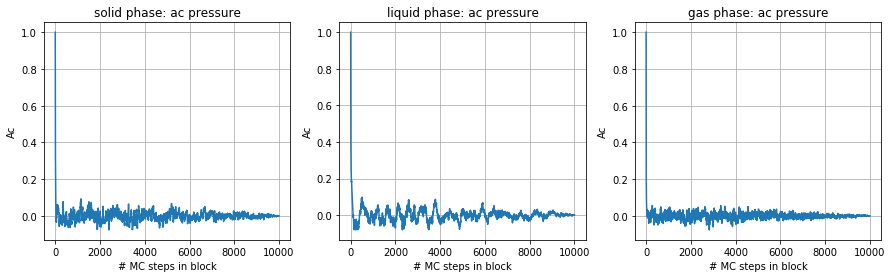

In [121]:
fig, bx = plt.subplots(nrows=1, ncols=3,figsize=(15,4),gridspec_kw=dict(wspace=0.2, hspace=0.5))
x = np.linspace(0,10000,10001)
# Solid AC
plot_AC("solid",0,x)
# Liquid AC
plot_AC("liquid",1,x)
# Gas AC
plot_AC("gas",2,x)

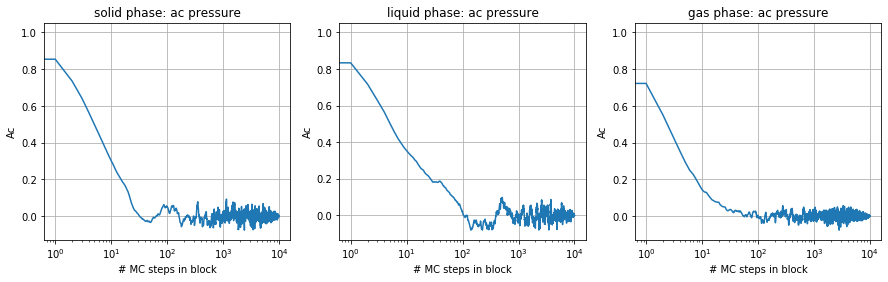

In [122]:
fig, bx = plt.subplots(nrows=1, ncols=3,figsize=(15,4),gridspec_kw=dict(wspace=0.2, hspace=0.5))
x = np.linspace(0,10000,10001)
# Solid AC
plot_AC_log("solid",0,x)
# Liquid AC
plot_AC_log("liquid",1,x)
# Gas AC
plot_AC_log("gas",2,x)

Possiamo vedere la funzione di auto correlazione è trascurabile in un range di "larghezza" dei blocchi compresa tra $[100,5000]$. Ci fermiamo a 5000 in quanto avendo al massimo 10000 MC steps, è la larghezza massima per avere almeno due blocchi.

#### <span style="color:blue">Statistical uncertainties as a function of 𝐿</span>

In [123]:
def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/n)

def stat_uncert_L(x,L):
    N = int((len(x)-1)/L)
    ave = np.zeros(N)
    av2 = np.zeros(N)
    sum_prog = np.zeros(N)
    su2_prog = np.zeros(N)
    err_prog = np.zeros(N)
    for i in range(N):
        Sum = 0
        for j in range(L): 
            k = j+i*L
            Sum += x[k]
        ave[i] = Sum/L       # r_i 
        av2[i] = (ave[i])**2 # (r_i)^2 
    

    for i in range(N): #accumulo i valori medi e quadratici medi
        for j in range(i+1):
            sum_prog[i] += ave[j] # SUM_{j=0,i} r_j
            su2_prog[i] += av2[j] # SUM_{j=0,i} (r_j)^2
        sum_prog[i]/=(i+1) # Cumulative average
        su2_prog[i]/=(i+1) # Cumulative square average
        err_prog[i] = error(sum_prog,su2_prog,i) # Statistical uncertainty
    return err_prog[1]
# calc uncert
def calc_uncet(state):
    f = np.zeros(100)
    g = np.zeros(100)
    h=10
    i=0
    while(h<=4910):
        pot, pres = read_7_2(state)
        f[i] = stat_uncert_L(pot,h)
        g[i]= stat_uncert_L(pres,h)
        i+=1
        h+=50
    return f, g
# plot
def plot_sigma(state,f,g):
    fig, bx = plt.subplots(nrows=1, ncols=2,figsize=(15,4),gridspec_kw=dict(wspace=0.3, hspace=0.5))
    x = np.linspace(10,4910,100)
    # ene int
    bx[0].plot(x,f,label='Statistical uncertainties')
    bx[0].set_xlabel("L: # steps for block")
    bx[0].set_ylabel("Sigma")
    bx[0].set_title(f"Statistical uncertainties pot. energy--> "+state)
    bx[0].legend()
    bx[0].grid(True)
    # pres
    bx[1].plot(x,g,color='orange',label='Statistical uncertainties')
    bx[1].set_xlabel("L: # steps for block")
    bx[1].set_ylabel("Sigma")
    bx[1].set_title(f"Statistical uncertainties pressure--> "+state)
    bx[1].legend()
    bx[1].grid(True)

* Solid

In [124]:
f, g = calc_uncet("solid")

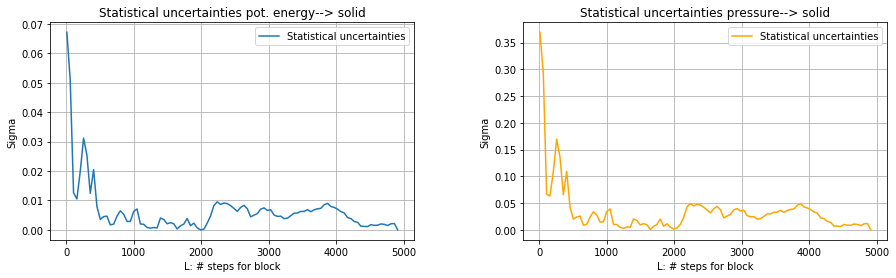

In [125]:
plot_sigma("solid",f,g)

* Liquid

In [126]:
f, g = calc_uncet("liquid")

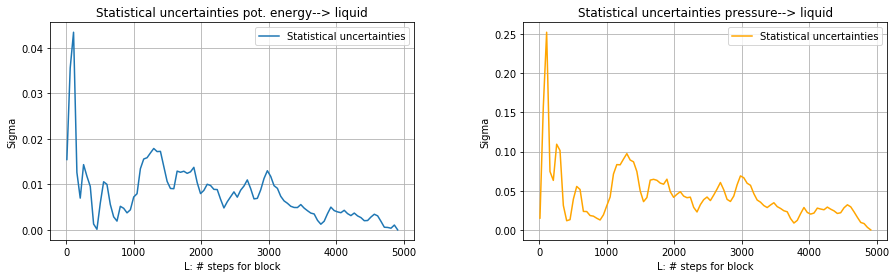

In [127]:
plot_sigma("liquid",f,g)

* Gas

In [128]:
f, g = calc_uncet("gas")

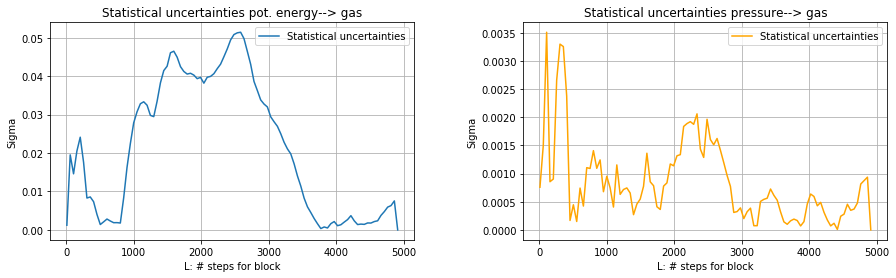

In [129]:
plot_sigma("gas",f,g)

Possiamo vedere che l'incertezza stat. oltre il (500-->solid; 750-->liquid; 750-->gas) step per blocco inizia a saturare attorno a un valore e quindi è inutile prendere blocchi più grandi se il nostro scopo è avere una stima dell'incertezze più precisa.

## <span style="color:green">Esercizio 7.2</span>

#### <span style="color:blue">Average value of g(r) of the block</span>

Ho salvato nei vari file `histogram_state.0` i valori di _Average value of g(r) of the block_ consecutivamente, che poi separo nel script sottostante per andare a graficare poi l'istogramma di ogni blocco. Possiamo notare che gli andamenti dei 10 blocchi hanno andamenti molto simili (statisticamente uguali). I file sono coì costituiti:

1° colonna|2° colonna
----------|----------
r|g(r)

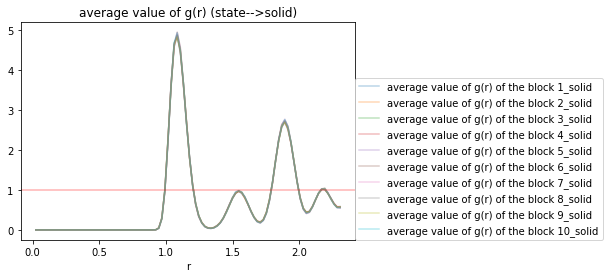

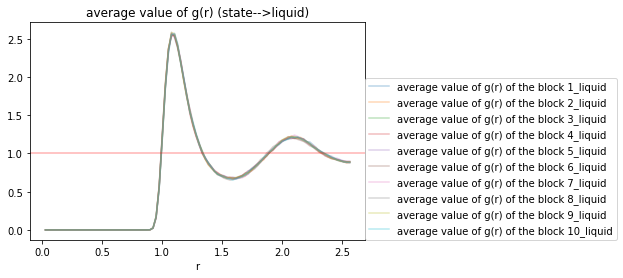

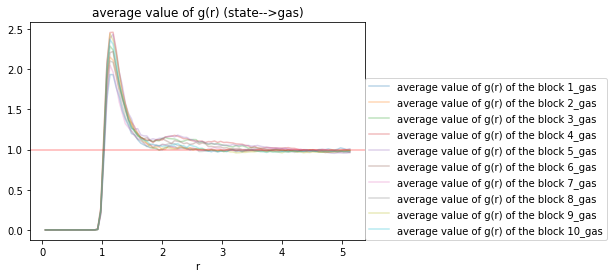

In [134]:
# blocks and state
nblk = 10
num_blk = ["1","2","3","4","5","6","7","8","9","10"]
state = ["solid","liquid","gas"]

for h in range(3):
    r, hist = np.loadtxt("7.2/data/histogram_"+state[h]+".0",\
                usecols=(0,1), delimiter=' ', unpack='true')
    N = int(len(hist)/nblk)
    # saving r
    Radius = np.zeros(N)
    for i in range(N):
        Radius[i] = r[i]
    # saving the 100 values of hist's bins
    for i in range(nblk):
        p = np.zeros(N)
        for j in range(N):
            p[j] = hist[i*N+j]
        plt.plot(Radius,p,alpha=0.3,label='average value of g(r) of the block '+num_blk[i]+"_"+state[h])
        plt.title('average value of g(r) (state-->'+state[h]+')')
        plt.xlabel('r')
        plt.legend(loc=(1.,0.))
    plt.axhline(y=1, color='r', alpha=0.3,linestyle='-', label= f'1')
    plt.show()

#### <span style="color:blue">Final average value of g(r) with statistical uncertainties</span>

Ho, per ogni bin, 10 blocchi quindi posso considerare come ogni bin una stima di g(r) con r fissato. Posso così procedere all'accumulazione e calcolo dell'incertezza (10 misure con incertezza per ogni bin). Prendo poi il decimo valore e lo uso per avere _Final average value of g(r) with statistical uncertainties_. Questo procedimento lo faccio con c++. Quindi quello è riportato è l'ultimo valore con errore della somma progressiva di 10 blocchi da 1000 steps. Dal grafico non risultando questi errori in quanto sono molto piccoli (come ci si aspettava). Il file di output `final_hist_(state).0` è così composto:

1° colonna|2° colonna|3° colonna
----------|----------|----------
r|g(r)|incertezza g(r)

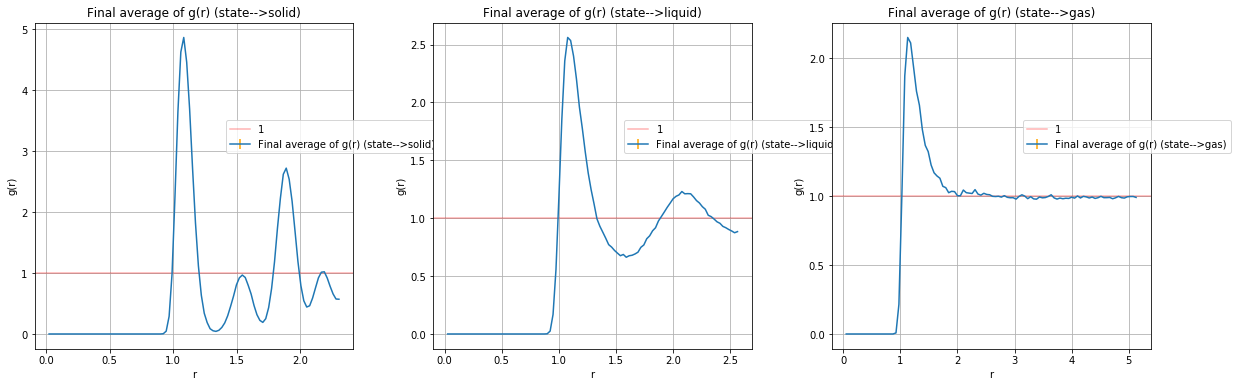

In [139]:
# blocks and state
nblk = 10
state = ["solid","liquid","gas"]
# set
fig, bx = plt.subplots(nrows=1, ncols=3,figsize=(20,6),gridspec_kw=dict(wspace=0.25, hspace=0.5))
# reading and plottinghist[i] = (double)rho*npart*deltaV;
for i in range(3):
    r, hist, err = np.loadtxt("7.2/data/final_hist_"+state[i]+".0",\
                usecols=(0,1,2), delimiter=' ', unpack='true')
    bx[i].errorbar(r,hist,yerr=err,ecolor='orange',label='Final average of g(r) (state-->'+state[i]+')')
    bx[i].axhline(y=1, color='r', alpha=0.3,linestyle='-', label= f'1')
    bx[i].set_title('Final average of g(r) (state-->'+state[i]+')')
    bx[i].set_xlabel('r')
    bx[i].set_ylabel('g(r)')
    bx[i].legend(loc=(0.6,0.6))
    bx[i].grid(True)
    